<a href="https://colab.research.google.com/github/sofitacal/TPS/blob/main/Analisis_de_la_base_de_datos_mdd%C2%A0patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 49.4 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import windows
from scipy.fft import fft
import scipy.io
import mne

In [ ]:
path = r'/content/drive/MyDrive/2025-2C/PROCESAMIENTO DE IMÁGENES Y SEÑALES BIOMÉDICAS/Practica Señales/Lectura de archivos de EEG'

# Carga del archivo .edf

In [ ]:
raw_edf_0 = mne.io.read_raw_edf(os.path.join(path, 'HS1EC.edf'), # uno el path de la carpeta con el nombre del archivo y creo el objeto Raw
                           preload=True) # carga los datos en memoria (para editarlos más fácilmente)

Extracting EDF parameters from /content/drive/MyDrive/2025-2C/PROCESAMIENTO DE IMÁGENES Y SEÑALES BIOMÉDICAS/Practica Señales/Lectura de archivos de EEG/HS1EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


In [ ]:
type(raw_edf_0)

mne.io.edf.edf.RawEDF

In [ ]:
raw_edf_0.info # diccionario que contiene la información del objeto

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 80.0 Hz
 meas_date: 2011-08-16 17:48:54 UTC
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: Ahmed_J_0816011, sex: 1, last_name: XX, birthday: 1987-01-20>
>

In [ ]:
raw_edf_0.ch_names # Lista de los nombres de los canales que tiene

['EEG Fp1-LE',
 'EEG F3-LE',
 'EEG C3-LE',
 'EEG P3-LE',
 'EEG O1-LE',
 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE',
 'EEG Fz-LE',
 'EEG Fp2-LE',
 'EEG F4-LE',
 'EEG C4-LE',
 'EEG P4-LE',
 'EEG O2-LE',
 'EEG F8-LE',
 'EEG T4-LE',
 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE',
 'EEG A2-A1',
 'EEG 23A-23R',
 'EEG 24A-24R']

In [ ]:
raw_edf_0.get_channel_types()

['eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg']

In [ ]:
for name, tipo in zip(raw_edf_0.ch_names, raw_edf_0.get_channel_types()):
    print(name, tipo)

EEG Fp1-LE eeg
EEG F3-LE eeg
EEG C3-LE eeg
EEG P3-LE eeg
EEG O1-LE eeg
EEG F7-LE eeg
EEG T3-LE eeg
EEG T5-LE eeg
EEG Fz-LE eeg
EEG Fp2-LE eeg
EEG F4-LE eeg
EEG C4-LE eeg
EEG P4-LE eeg
EEG O2-LE eeg
EEG F8-LE eeg
EEG T4-LE eeg
EEG T6-LE eeg
EEG Cz-LE eeg
EEG Pz-LE eeg
EEG A2-A1 eeg
EEG 23A-23R eeg
EEG 24A-24R eeg


In [ ]:
times_edf = raw_edf_0.times # obtengo el vector de tiempos en segundos (los tiempos de cada muestra)
times_edf

array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       2.99988281e+02, 2.99992188e+02, 2.99996094e+02])

In [ ]:
data_edf = raw_edf_0.get_data() # Obtener un numpy array con todos los canales
data_edf #  Muestro el array NumPy de los datos de los canales

array([[-5.15039292e-06, -7.25055314e-06, -8.75066758e-06, ...,
        -1.35010300e-06,  1.55011826e-06,  4.65035477e-06],
       [-8.85067521e-06, -1.20509194e-05, -1.50511482e-05, ...,
         3.35025559e-06,  3.55027085e-06,  3.65027848e-06],
       [-1.17508965e-05, -2.05515679e-05, -2.90522164e-05, ...,
         1.50511482e-05,  1.51511559e-05,  1.36510414e-05],
       ...,
       [-2.15016403e-06,  6.50049592e-07,  6.05046159e-06, ...,
        -5.45041581e-06, -6.05046159e-06, -5.15039292e-06],
       [-5.47541772e-05, -5.27540246e-05, -4.45533989e-05, ...,
        -1.58512093e-05, -9.35071336e-06, -3.15024033e-06],
       [ 5.78544137e-05,  3.38525826e-05,  6.45049210e-06, ...,
         4.28532692e-05,  4.72536049e-05,  5.03538415e-05]])

In [ ]:
data_edf.shape # Veo la dimensión (n_canales, m_muestras)

(22, 76800)

In [ ]:
data_edf, times_edf = raw_edf_0[:]

In [ ]:
times_edf

array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       2.99988281e+02, 2.99992188e+02, 2.99996094e+02])

In [ ]:
data_edf

array([[-5.15039292e-06, -7.25055314e-06, -8.75066758e-06, ...,
        -1.35010300e-06,  1.55011826e-06,  4.65035477e-06],
       [-8.85067521e-06, -1.20509194e-05, -1.50511482e-05, ...,
         3.35025559e-06,  3.55027085e-06,  3.65027848e-06],
       [-1.17508965e-05, -2.05515679e-05, -2.90522164e-05, ...,
         1.50511482e-05,  1.51511559e-05,  1.36510414e-05],
       ...,
       [-2.15016403e-06,  6.50049592e-07,  6.05046159e-06, ...,
        -5.45041581e-06, -6.05046159e-06, -5.15039292e-06],
       [-5.47541772e-05, -5.27540246e-05, -4.45533989e-05, ...,
        -1.58512093e-05, -9.35071336e-06, -3.15024033e-06],
       [ 5.78544137e-05,  3.38525826e-05,  6.45049210e-06, ...,
         4.28532692e-05,  4.72536049e-05,  5.03538415e-05]])

In [ ]:
raw_edf_0.info['sfreq'] # Veo la frecuencia de muestreo

256.0

Calculo y muestro la duración total del registro en segundos y minutos. Para ello, divido el número total de muestras por la frecuencia de muestreo.
También muestro la cantidad de canales registrados.

In [ ]:
fs_edf = raw_edf_0.info['sfreq']

In [ ]:
print(f'En el registro hay {data_edf.shape[1]/fs_edf} segundos ({data_edf.shape[1]/fs_edf/60} mins) de registro')
print(f'En el registro hay {len(raw_edf_0.ch_names)} canales registrados')

En el registro hay 300.0 segundos (5.0 mins) de registro
En el registro hay 22 canales registrados


In [ ]:
raw_edf_0.ch_names # Veo los nombres de los canales

['EEG Fp1-LE',
 'EEG F3-LE',
 'EEG C3-LE',
 'EEG P3-LE',
 'EEG O1-LE',
 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE',
 'EEG Fz-LE',
 'EEG Fp2-LE',
 'EEG F4-LE',
 'EEG C4-LE',
 'EEG P4-LE',
 'EEG O2-LE',
 'EEG F8-LE',
 'EEG T4-LE',
 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE',
 'EEG A2-A1',
 'EEG 23A-23R',
 'EEG 24A-24R']

Si quiero por ejemplo el canal 'EEG Fp1-LE', lo selecciono según su índice (índice 0) del array de datos.

In [ ]:
ch1 = data_edf[0] # Selecciono el primer canal --> Es el canal EEG Fp1-LE
ch1_name = raw_edf_0.ch_names[0] # Selecciono el nombre del primer canal
print(ch1)
print(ch1_name)

[-5.15039292e-06 -7.25055314e-06 -8.75066758e-06 ... -1.35010300e-06
  1.55011826e-06  4.65035477e-06]
EEG Fp1-LE


O puedo utilizar las funciones `raw.pick()` para seleccionar algunos canales específicos o un tipo de canal (ej todos los EEG, o los EOG, etc).

In [ ]:
for name, tipo in zip(raw_edf_1.ch_names, raw_edf_1.get_channel_types()):
    print(name, tipo)

NameError: name 'raw_edf_1' is not defined

Con `.annotations` puedo ver si hay anotaciones. Las anotaciones son globales, para todos los canales. Se pueden marcar etapas de sueño, eventos, artefactos, estímulos... Y tienen un onset (comienzo), duration (duración) y description (etiqueta).

In [ ]:
raw_edf_0.annotations

<Annotations | 0 segments>

También puedo ver si hay canales marcados como "bad channels", es decir, canales que tienen mucho ruido o se perdieron para eliminarlos de futuros análisis.

In [ ]:
raw_edf_0.info['bads']

[]

También puedo eliminar canales usando `.drop_channels`

In [ ]:
raw_edf_2 = raw_edf_0.copy()
raw_edf_2.info['bads'] = ['EEG O1-LE', 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE']
raw_edf_2.info['bads']

['EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE']

In [ ]:
raw_edf_2.ch_names

['EEG Fp1-LE',
 'EEG F3-LE',
 'EEG C3-LE',
 'EEG P3-LE',
 'EEG O1-LE',
 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE',
 'EEG Fz-LE',
 'EEG Fp2-LE',
 'EEG F4-LE',
 'EEG C4-LE',
 'EEG P4-LE',
 'EEG O2-LE',
 'EEG F8-LE',
 'EEG T4-LE',
 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE',
 'EEG A2-A1',
 'EEG 23A-23R',
 'EEG 24A-24R']

In [ ]:
raw_edf_2.drop_channels(['EEG T4-LE',
 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE'])
raw_edf_2.ch_names

['EEG Fp1-LE',
 'EEG F3-LE',
 'EEG C3-LE',
 'EEG P3-LE',
 'EEG O1-LE',
 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE',
 'EEG Fz-LE',
 'EEG Fp2-LE',
 'EEG F4-LE',
 'EEG C4-LE',
 'EEG P4-LE',
 'EEG O2-LE',
 'EEG F8-LE',
 'EEG A2-A1',
 'EEG 23A-23R',
 'EEG 24A-24R']

# Visualizacion del EEG


Ahora veamos cómo podemos visualizar los canales del objeto raw que generamos a partir del edf.

In [ ]:
data_edf, times_edf = raw_edf_0[:]
cant_canales_edf = data_edf.shape[0]

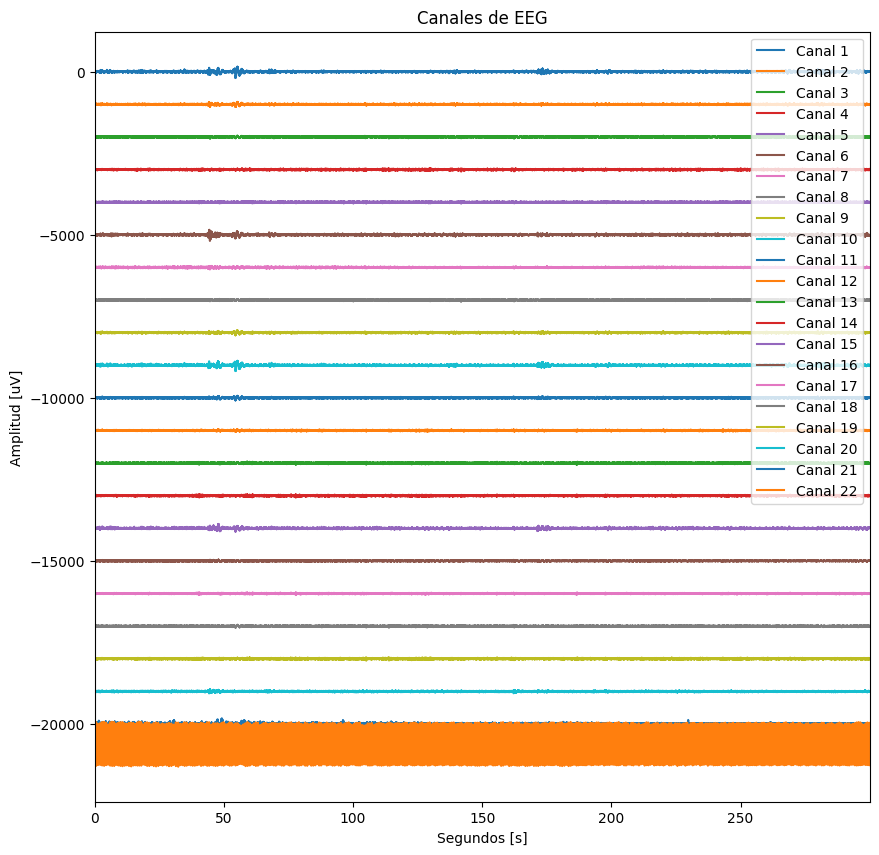

In [ ]:
canales_edf = np.arange(0,cant_canales_edf)+1

plt.figure(figsize=(10,10))
i = 0
spacing = 1000
for c in canales_edf:
  plt.plot(times_edf, data_edf[c-1]*1e6-i, label = f'Canal {c}')
  i += spacing
plt.xlabel('Segundos [s]')
plt.ylabel('Amplitud [uV]')
plt.xlim([times_edf[0],times_edf[-1]])
plt.title('Canales de EEG')
plt.legend(loc = 'upper right')
plt.show()

Using matplotlib as 2D backend.


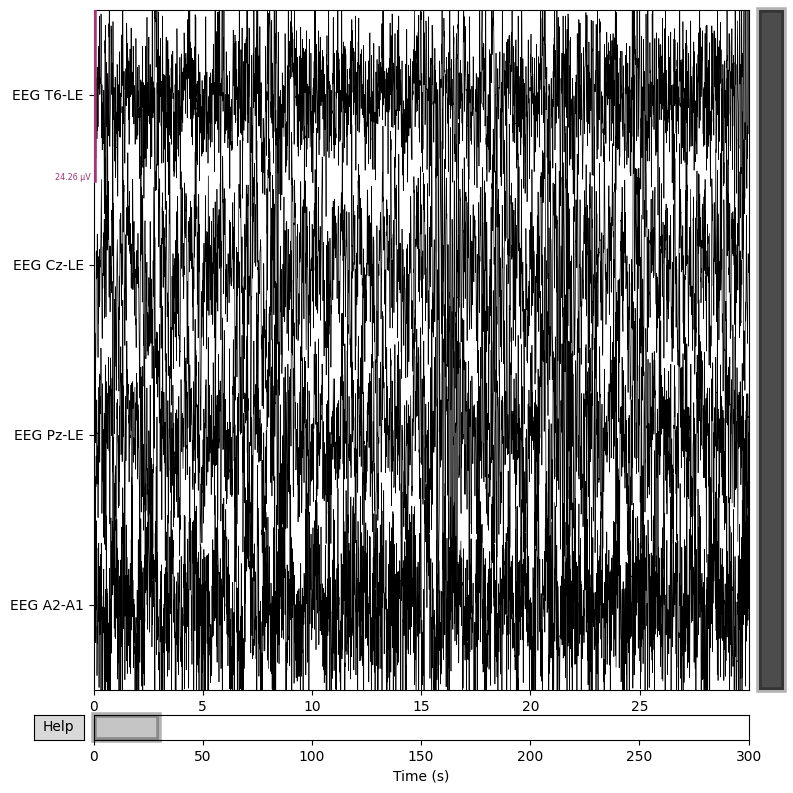

In [ ]:
raw_edf_0.plot(picks=[ 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE',
 'EEG A2-A1'], duration=30, scalings='auto') # seleccionamos solo algunos canales
plt.show()

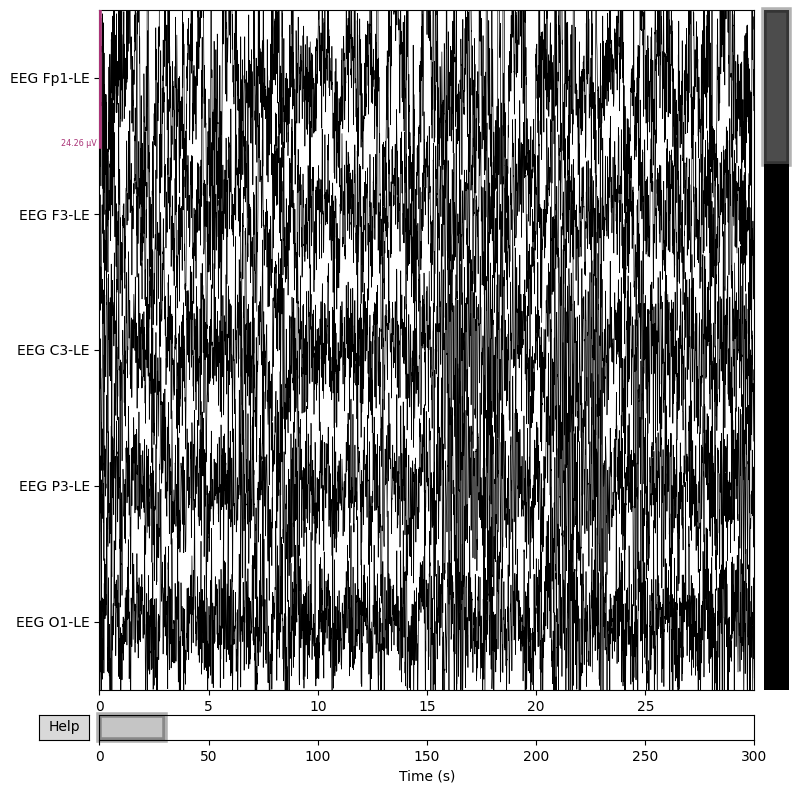

In [ ]:
raw_edf_0.plot(n_channels=5, duration=30, scalings='auto') # seleccionamos solo algunos canales
plt.show()

# Espectro del EEG

In [ ]:
def welch_per(x, fs, nperseg, nfft, noverlap):
  """
  Implementa el cálculo del espectro de densidad de potencia (PSD) usando el método de Welch con segmentos solapados (overlapping).

  Parámetros:
  x: señal
  fs: frecuencia de muestreo en Hz
  nperseg: cantidad de muestras por segmento (largo de ventana)
  nfft: número de puntos de la FFT
  noverlap: cantidad de muestras que se superponen

  window: utiliza hanning
  """
  step = int(nperseg - noverlap)                     # Avance entre ventanas
  win = scipy.signal.windows.hann(nperseg)        # Ventana de Hanning --> devuelve la ventana de nperseg muestras

  psd = np.zeros(nfft)                          # Inicializa PSD acumulado
  count = 0                                     # Contador de segmentos para dividir despues la suma

  for start in range(0, len(x) - nperseg + 1, step):
    segment = x[start:start + nperseg]        # Extrae segmento con solapamiento
    windowed = segment * win                  # Aplica ventana
    fft_segment = np.fft.fft(windowed, n=nfft) # Es two sided (incluye tanto las frecuencias positivas como las negativas)
    psd += np.abs(fft_segment)**2 / nfft     # Calcula el periodograma (cuadrado del valor absoluto de la DTFT) y lo acumula --> se divide por nfft que es igual anperseg a menos que se haga zero padding
    count += 1

  psd /= count                                  # Obtiene el promedio dividiendo la suma sobre la cantidad de segmentos
  psd = psd[:nfft // 2] *2                      # Me quedo solo con la mitad positiva y multiplico por 2 para conservar la energía total
  freq = np.linspace(0, fs / 2, nfft // 2)      # Armo el eje de frecuencias --> hasta fs/2 por el teorema de Nyquist, con una cantidad de puntos de nfft/2 (porque tengo solo las positivas)

  return freq, psd


In [ ]:
x_mat = data_edf
fs_mat = fs_edf

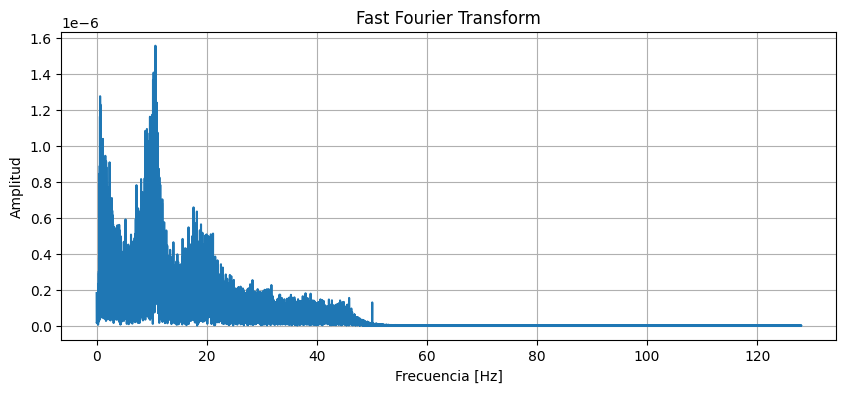

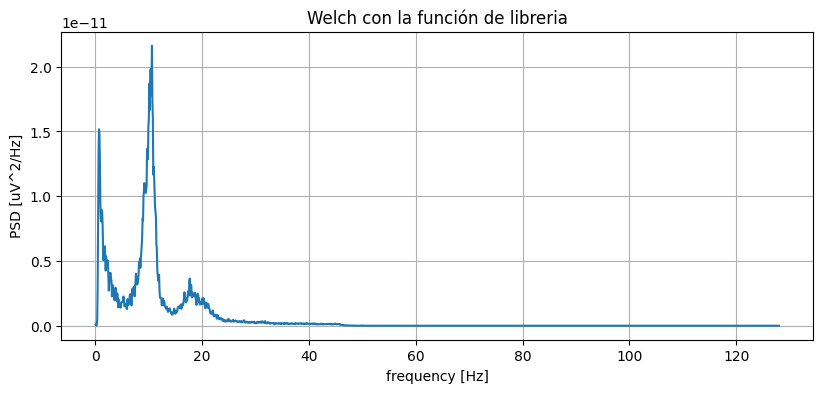

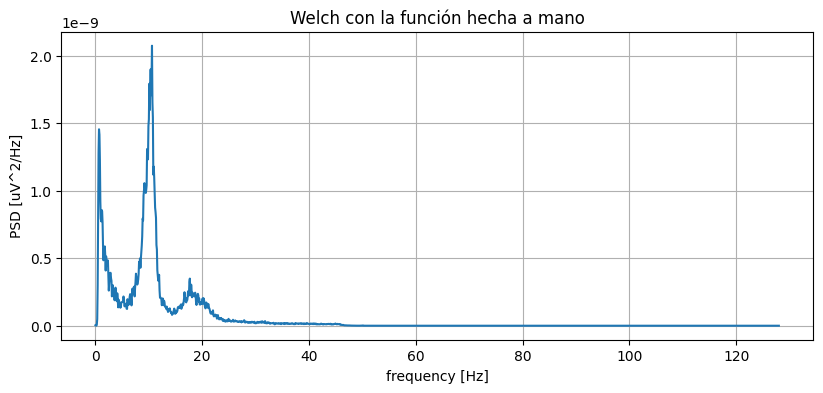

In [ ]:
canal = 4 # Elegimos un canal para analizar

canal_fft = fft( x_mat[canal-1]) # Aplicamos la Transformada Rápida de Fourier (FFT) con la función de scipy al canal seleccionado
canal_fft = canal_fft[:len(canal_fft)//2] # Nos quedamos solo con la mitad positiva del espectro (la FFT es simétrica)
L = canal_fft.shape[0] # L es la longitud del espectro de la mitad que vamos a graficar

f = np.linspace(0,fs_mat/2,L) # Generamos un vector de frecuencias desde 0 hasta fs/2 (Nyquist) de L puntos
y = 2.0/L * np.abs(canal_fft) # Calculamos la magnitud del espectro (módulo de los números complejos resultantes de la FFT y normalizada)
                              # L es la cantidad de puntos en la mitad positiva de la FFT.
                              # * 2.0 compensa  el hecho de que tomamos solo media FFT (la parte positiva), y entonces duplicamos las amplitudes para conservar la energía total

# Graficamos el espectro usando la FFT
plt.figure(figsize = (10,4))
plt.title('Fast Fourier Transform')
plt.plot(f,y)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

# Calculamos la PSD (densidad espectral de potencia) usando el método de Welch
nper = int(len(x_mat[canal-1])//25) # Definimos el nperseg como 1/25 del total de muestras del canal
f, Pxx_den = scipy.signal.welch(x_mat[canal-1], fs_mat, noverlap=nper/2, nperseg=nper) # Aplicamos el método de Welch (noverlap: cantidad de puntos de solapamiento entre ventanas (aquí 50%))

# Graficamos la PSD obtenida por Welch
plt.figure(figsize = (9.7,4))
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [uV^2/Hz]')
plt.title('Welch con la función de libreria')
plt.grid()
plt.show()


f, psd = welch_per(x=x_mat[canal-1], fs=fs_mat, nperseg=nper, nfft=nper, noverlap=nper/2)

# Graficamos la PSD obtenida por la funcion de Welch
plt.figure(figsize = (9.7,4))
plt.plot(f, psd)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [uV^2/Hz]')
plt.title('Welch con la función hecha a mano')
plt.grid()
plt.show()

# Eliminacion de ruido

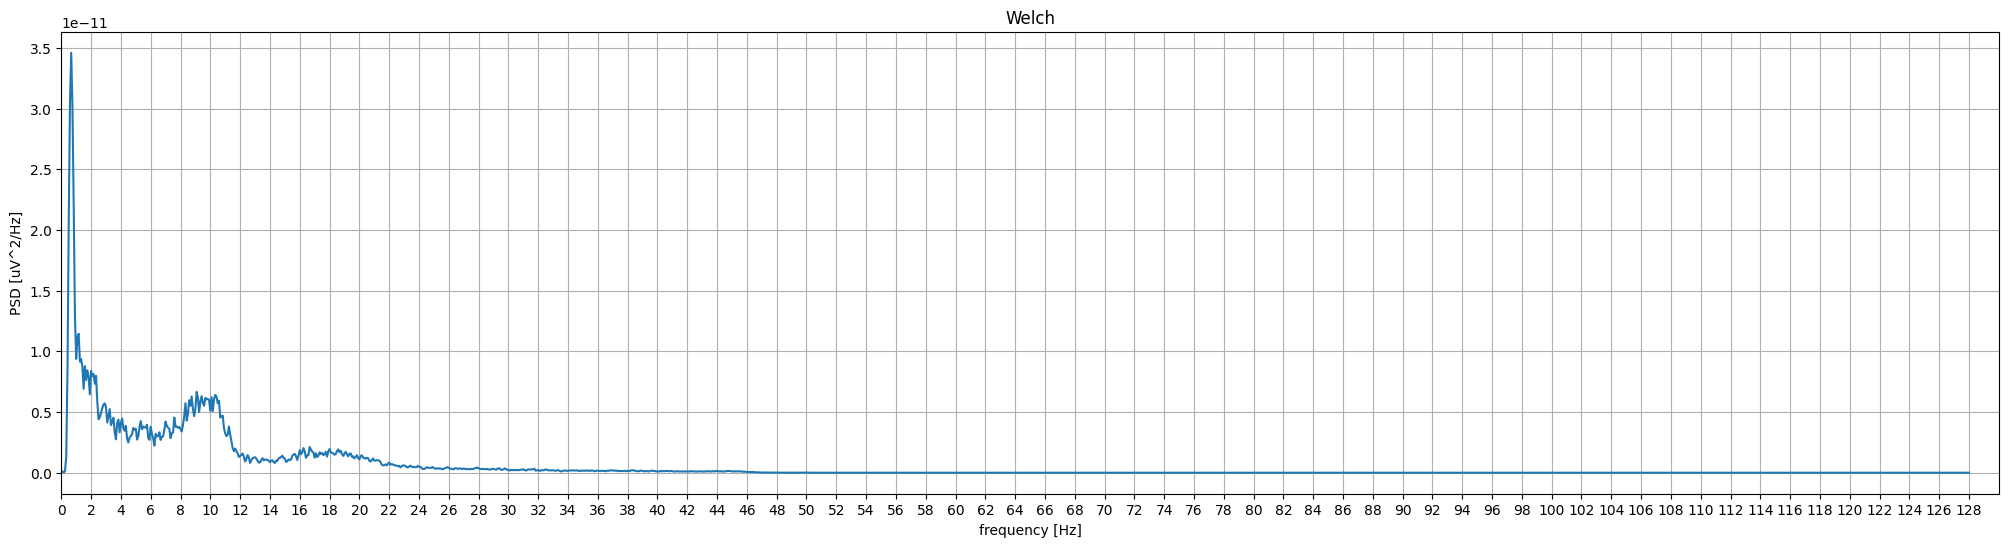

In [ ]:
canal = 18 # seleccionamos un canal

# Calculamos la PSD (densidad espectral de potencia) usando el método de Welch
nper = int(len(x_mat[canal-1])//25) # Definimos el nperseg (el número de puntos por segmento) como 1/25 del total de muestras del canal
f, Pxx_den = scipy.signal.welch(x_mat[canal-1], fs_mat, noverlap=nper/2, nperseg=nper) # Aplicamos el método de Welch (noverlap: cantidad de puntos de solapamiento entre ventanas (aquí 50%))

# Graficamos la PSD obtenida por Welch
plt.figure(figsize = (25,6))
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [uV^2/Hz]')
plt.title('Welch')
plt.xlim(0, 130)
plt.xticks(np.arange(0,130,2))
plt.grid()
plt.show()